In [5]:
import numpy as np 
import pandas as pd 
import matplotlib
from matplotlib import pyplot as plt 
import datetime

sales = pd.read_excel('Superstore Sales.xls', index_col = 0)

In [4]:
sales.describe(include = 'all')
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8399 entries, 1 to 8399
Data columns (total 22 columns):
Order ID                8399 non-null int64
Order Date              8399 non-null datetime64[ns]
Order Priority          8399 non-null object
Order Quantity          8399 non-null int64
Sales                   8399 non-null float64
Discount                8399 non-null float64
Ship Mode               8399 non-null object
Profit                  8399 non-null float64
Unit Price              8399 non-null float64
Shipping Cost           8399 non-null float64
Customer Name           8399 non-null object
City                    8399 non-null object
Zip Code                8399 non-null int64
State                   8399 non-null object
Region                  8399 non-null object
Customer Segment        8399 non-null object
Product Category        8399 non-null object
Product Sub-Category    8399 non-null object
Product Name            8399 non-null object
Product Container       8399

In [11]:
def get_year(value):
    year = value.year
    return year
sales['Ship year'] = sales['Ship Date'].apply(get_year)

In [14]:
newdf = sales[(sales['Ship year'] == 2010)&(sales['Order Priority'] == 'High')]
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 454 entries, 62 to 8385
Data columns (total 23 columns):
Order ID                454 non-null int64
Order Date              454 non-null datetime64[ns]
Order Priority          454 non-null object
Order Quantity          454 non-null int64
Sales                   454 non-null float64
Discount                454 non-null float64
Ship Mode               454 non-null object
Profit                  454 non-null float64
Unit Price              454 non-null float64
Shipping Cost           454 non-null float64
Customer Name           454 non-null object
City                    454 non-null object
Zip Code                454 non-null int64
State                   454 non-null object
Region                  454 non-null object
Customer Segment        454 non-null object
Product Category        454 non-null object
Product Sub-Category    454 non-null object
Product Name            454 non-null object
Product Container       454 non-null object
Pro

c:\users\haoxiang_weng\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


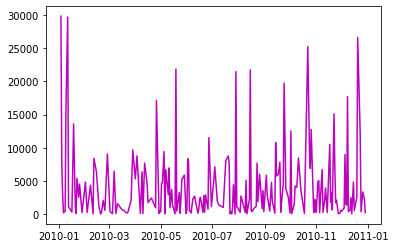

In [17]:
newdf.sort_values(by=['Order Date'], inplace=True)
x = np.array(newdf["Order Date"].unique())
y = np.array(newdf["Sales"].astype(int).groupby(newdf["Order Date"]).sum())
plt.plot(x,y, 'm')
plt.show()

In [29]:
mincost = np.array(sales['Shipping Cost'].groupby(sales['Product Container']).min())
maxcost = np.array(sales['Shipping Cost'].groupby(sales['Product Container']).max())
shipcontainer = sorted(np.array(sales['Product Container'].unique()))

In [30]:
print(sales['Shipping Cost'].groupby(sales['Product Container']).min())
print(mincost)
print(maxcost)
print(shipcontainer)

Product Container
Jumbo Box     0.50
Jumbo Drum    0.75
Large Box     3.97
Medium Box    0.99
Small Box     0.49
Small Pack    0.99
Wrap Bag      0.70
Name: Shipping Cost, dtype: float64
[0.5  0.75 3.97 0.99 0.49 0.99 0.7 ]
[154.12 164.73  69.    58.66  57.87  54.95  37.58]
['Jumbo Box', 'Jumbo Drum', 'Large Box', 'Medium Box', 'Small Box', 'Small Pack', 'Wrap Bag']


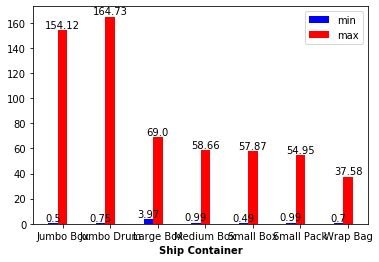

In [82]:
barwidth = 0.2
x1 = range(len(shipcontainer))
x2 = [x + barwidth for x in x1]
plt.bar(x1, mincost, color = 'b', width = barwidth, label = 'min')
plt.bar(x2, maxcost, color = 'r', width = barwidth, label = 'max')
plt.xlabel('Ship Container', fontweight = 'bold')
for x, y in enumerate(mincost):
    plt.text(x, y + 8, '%s' % y, ha='center', va='top')
for x, y in enumerate(maxcost):
    plt.text(x + barwidth, y + 8, '%s' % y, ha='center', va='top')
plt.xticks([r + barwidth for r in range(len(shipcontainer))], shipcontainer)
plt.legend()
plt.show()

In [104]:
sales['Region'].unique()
sales[sales['Region'] == 'West']['Profit'].groupby(sales['Product Category']).sum()

Product Category
Furniture           48936.8100
Office Supplies    103761.5840
Technology         146819.1663
Name: Profit, dtype: float64

In [115]:
x = sorted(np.array(sales['Region'].unique()))
y_of = round(sales[sales['Product Category'] == 'Office Supplies']['Profit'].groupby(sales['Region']).sum(),2)
y_f = round(sales[sales['Product Category'] == 'Furniture']['Profit'].groupby(sales['Region']).sum(),2)
y_t = round(sales[sales['Product Category'] == 'Technology']['Profit'].groupby(sales['Region']).sum(),2)

In [116]:
print(x)
print(y_of)
print(y_f)
print(y_t)

['Central', 'East', 'South', 'West']
Region
Central    162819.10
East       138124.08
South      113316.69
West       103761.58
Name: Profit, dtype: float64
Region
Central    32442.47
East       -5285.31
South      41339.01
West       48936.81
Name: Profit, dtype: float64
Region
Central    286629.67
East       185013.27
South      267851.41
West       146819.17
Name: Profit, dtype: float64


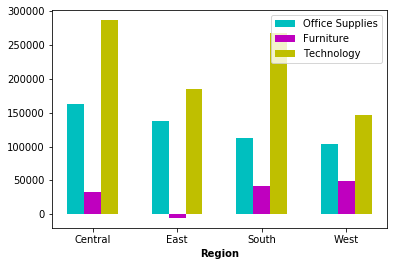

In [117]:
w = 0.2
x1 = range(len(x))
x2 = [y + w for y in x1]
x3 = [y + w for y in x2]

plt.bar(x1, y_of, color = 'c', width = w, label = 'Office Supplies')
plt.bar(x2, y_f, color = 'm', width = w, label = 'Furniture')
plt.bar(x3, y_t, color = 'y', width = w, label = 'Technology')

plt.xlabel('Region', fontweight = 'bold')
plt.xticks([r + w for r in range(len(x1))], x)
plt.legend()
plt.show()